---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

## Preamble and Datasets

<IPython.core.display.Javascript object>


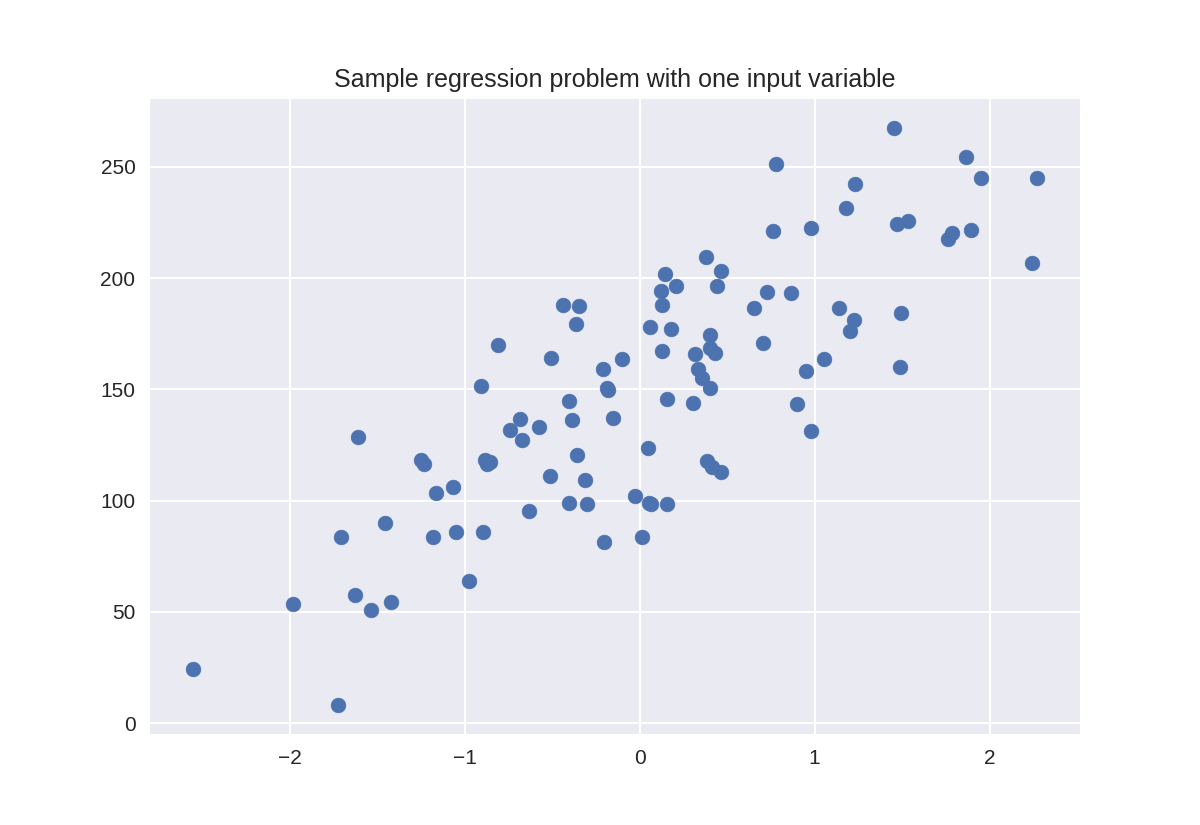

<IPython.core.display.Javascript object>


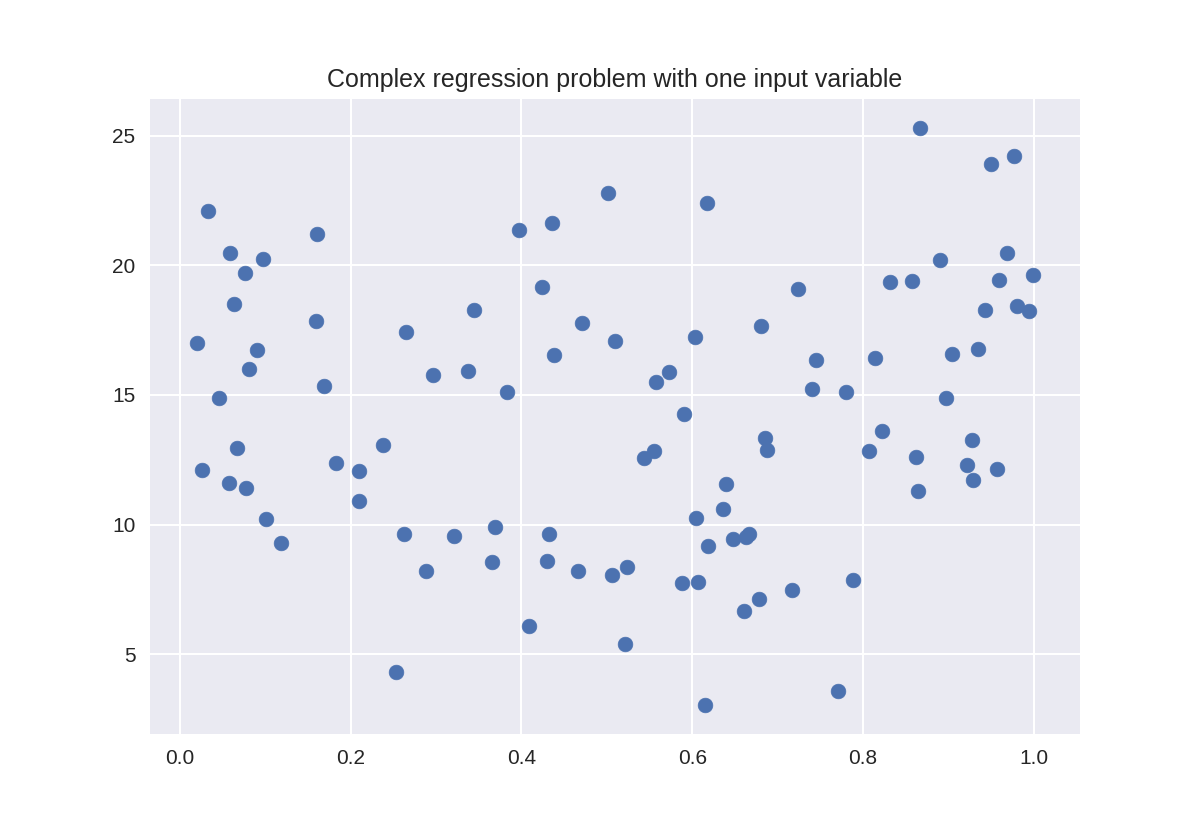

<IPython.core.display.Javascript object>


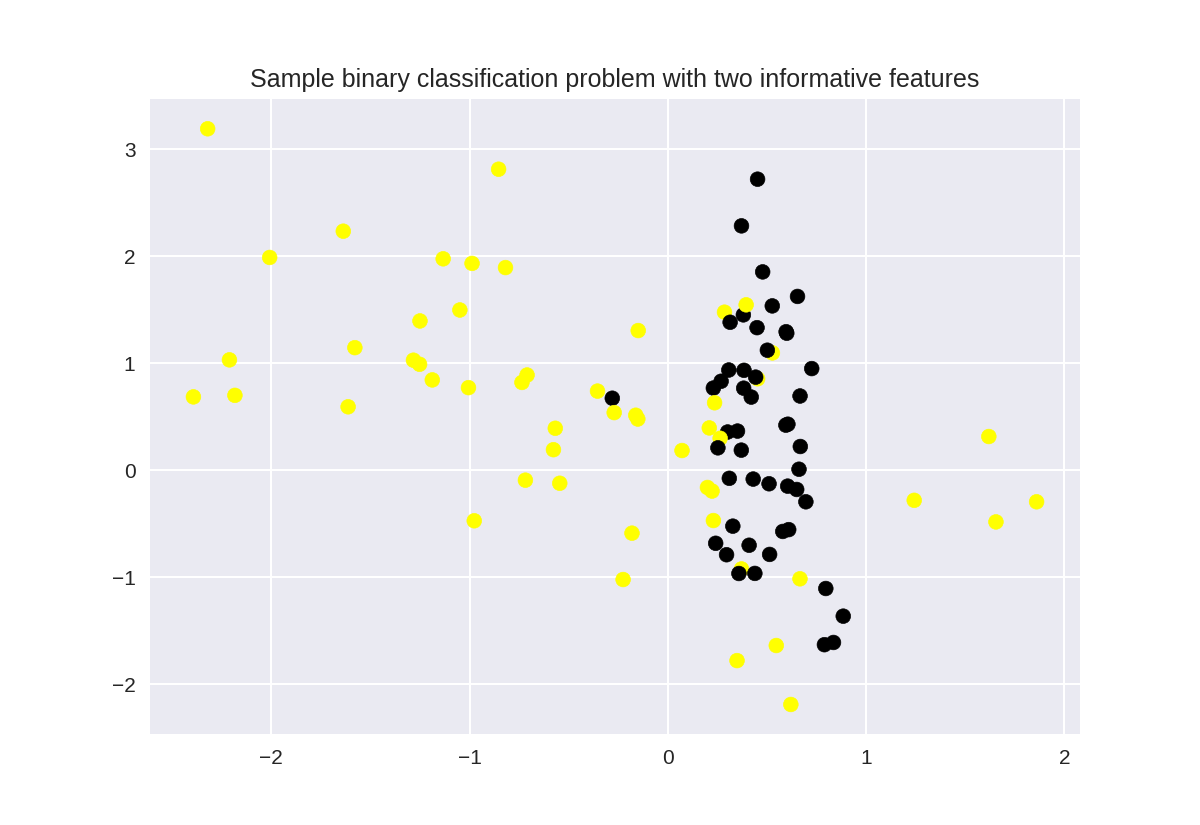

<IPython.core.display.Javascript object>


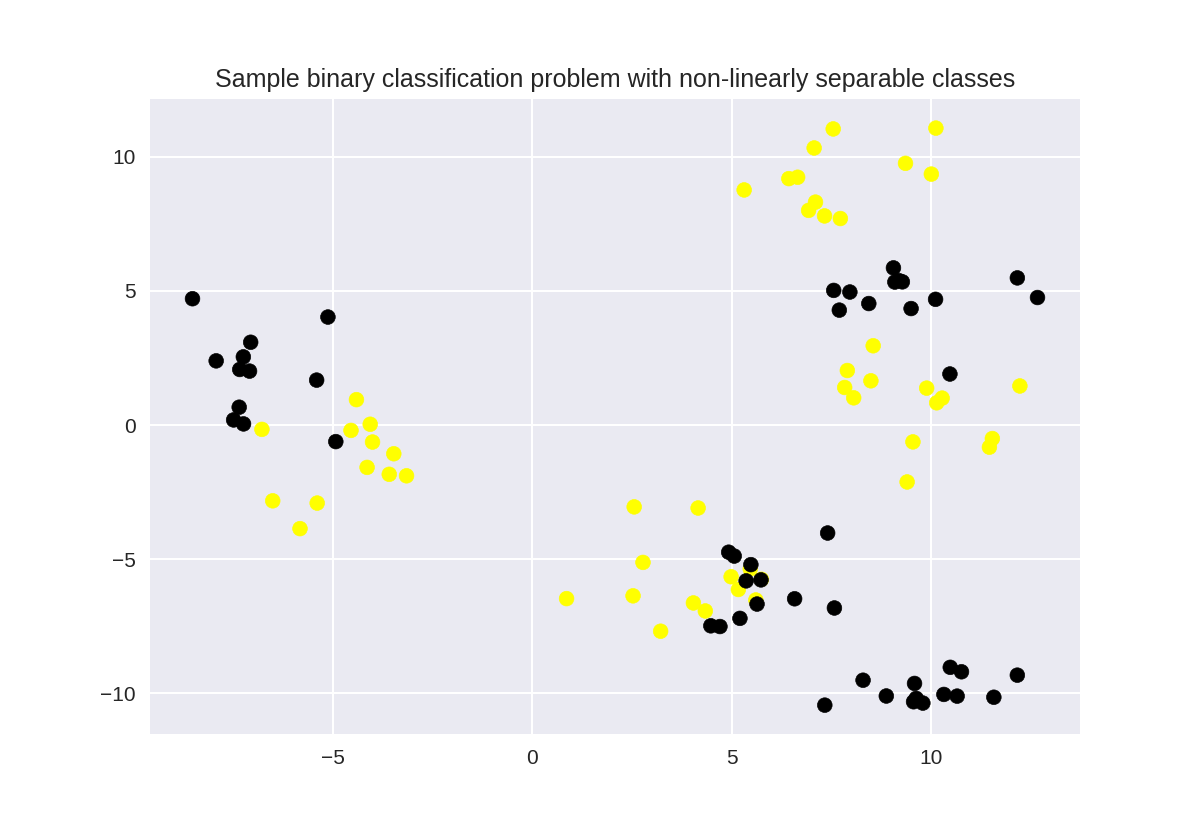

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers

<IPython.core.display.Javascript object>


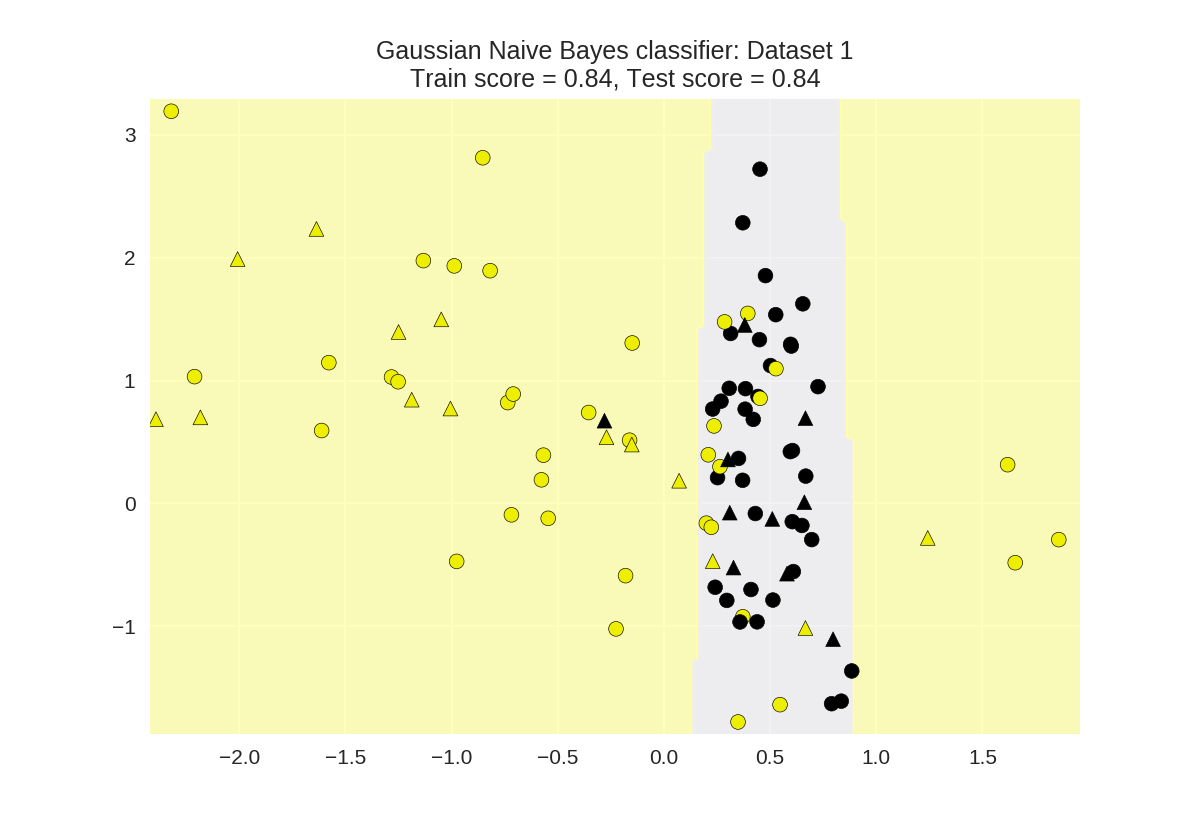

In [2]:
'''
To use the Gaussian Naive Bayes classifier in Python, 
we just instantiate an instance of the Gaussian NB class and call the fit method on the training data just as we would with any other classifier. 
It's worth noting that the Naive Bayes models are among a few classifiers in scikit learn that support a method called partial fit, 
which can be used instead of fit to train the classifier incrementally in case you're working with a huge data set that doesn't fit into memory. 
More details on that are available in the scikit learn documentation for Naive Bayes. 
For the Gaussian NB class there are no special parameters to control the models complexity. 
Looking at one example in the notebook from our synthetic two class dataset, 
we can see that, in fact, the Gaussian Naive Bayes classifier achieves quite good performance on this simple classification example. When the classes are no longer as easily separable as with this second, more difficult binary example here. Like linear models, Naive Bayes does not perform as well. 
'''

from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

<IPython.core.display.Javascript object>


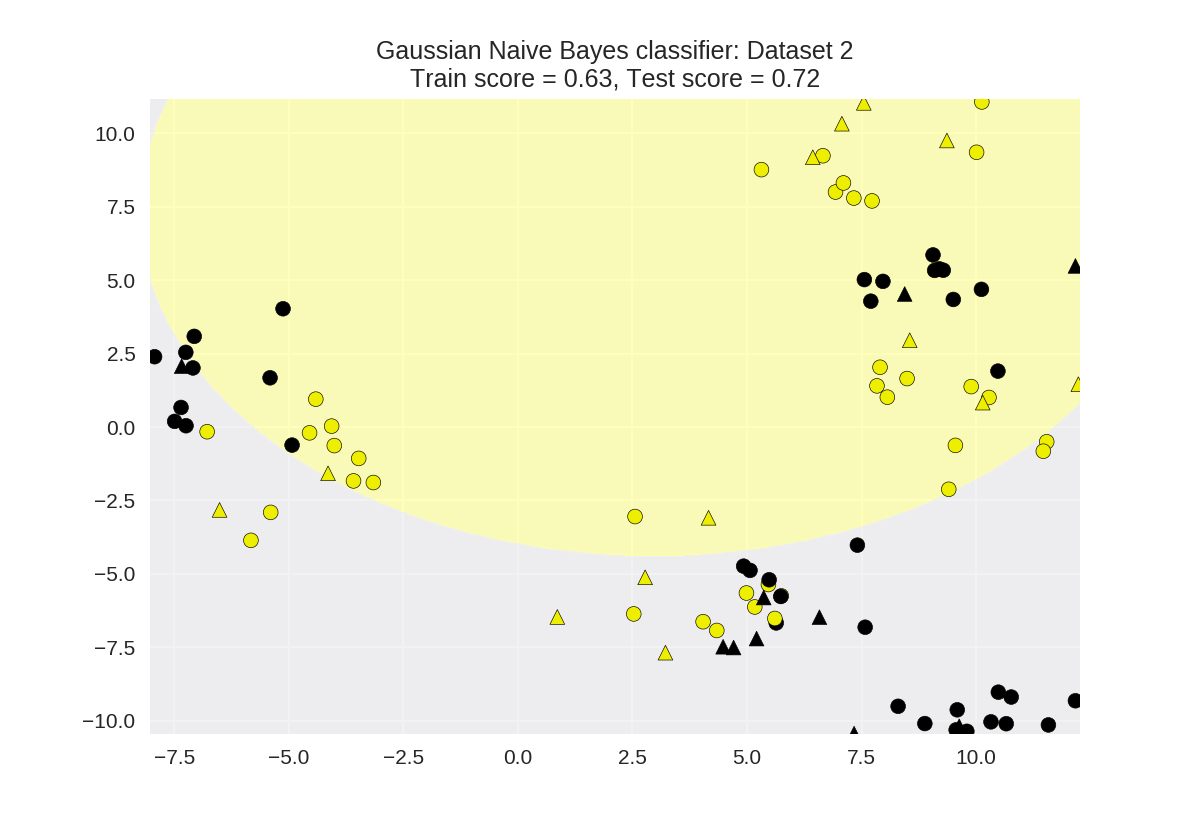

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

In [7]:
'''
On a real world example, using the breast cancer data set, the Gaussian Naive Bayes Classifier also does quite well, being quite competitive with other methods, such as support vector classifiers. 
'''
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


## Ensembles of Decision Trees

### Random forests

In [8]:
'''
A widely used and effective method in machine learning involves creating learning models known as ensembles. An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone. Why are ensembles effective? Well, one reason is that if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. Random forests are an example of the ensemble idea applied to decision trees. Random forests are widely used in practice and achieve very good results on a wide variety of problems. They can be used as classifiers via the sklearn RandomForestClassifier class or for regression using the RandomForestRegressor class both in the sklearn ensemble module. As we saw earlier, one disadvantage of using a single decision tree was that decision trees tend to be prone to overfitting the training data. As its name would suggest, a random forest creates lots of individual decision trees on a training set, often on the order of tens or hundreds of trees. The idea is that each of the individual trees in a random forest should do reasonably well at predicting the target values in the training set but should also be constructed to be different in some way from the other trees in the forest. Again, as the name would suggest this difference is accomplished by introducing random variation into the process of building each decision tree. This random variation during tree building happens in two ways. First, the data used to build each tree is selected randomly and second, the features chosen in each split tests are also randomly selected. To create a random forest model you first decide on how many trees to build. This is set using the n_estimated parameter for both RandomForestClassifier and RandomForestRegressor. Each tree were built from a different random sample of the data called the bootstrap sample. Bootstrap samples are commonly used in statistics and machine learning. If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random with replacement, that is, allowing for the possibility of picking the same row again at each selection. You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement. When building a decision tree for a random forest, the process is almost the same as for a standard decision tree but with one important difference. When picking the best split for a node, instead of finding the best split across all possible features, a random subset of features is chosen and the best split is found within that smaller subset of features. The number of features in the subset that are randomly considered at each stage is controlled by the max_features parameter. This randomness in selecting the bootstrap sample to train an individual tree in a forest ensemble, combined with the fact that splitting a node in the tree is restricted to random subsets of the features of the split, virtually guarantees that all of the decision trees and the random forest will be different.

'''

"\nA widely used and effective method in machine learning involves creating learning models known as ensembles. An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone. Why are ensembles effective? Well, one reason is that if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. Random forests are an example of the ensemble idea applied to decision trees. Random forests are widely used in practice and achieve very good results on a wide variety of problems. They can be used as classif

<IPython.core.display.Javascript object>


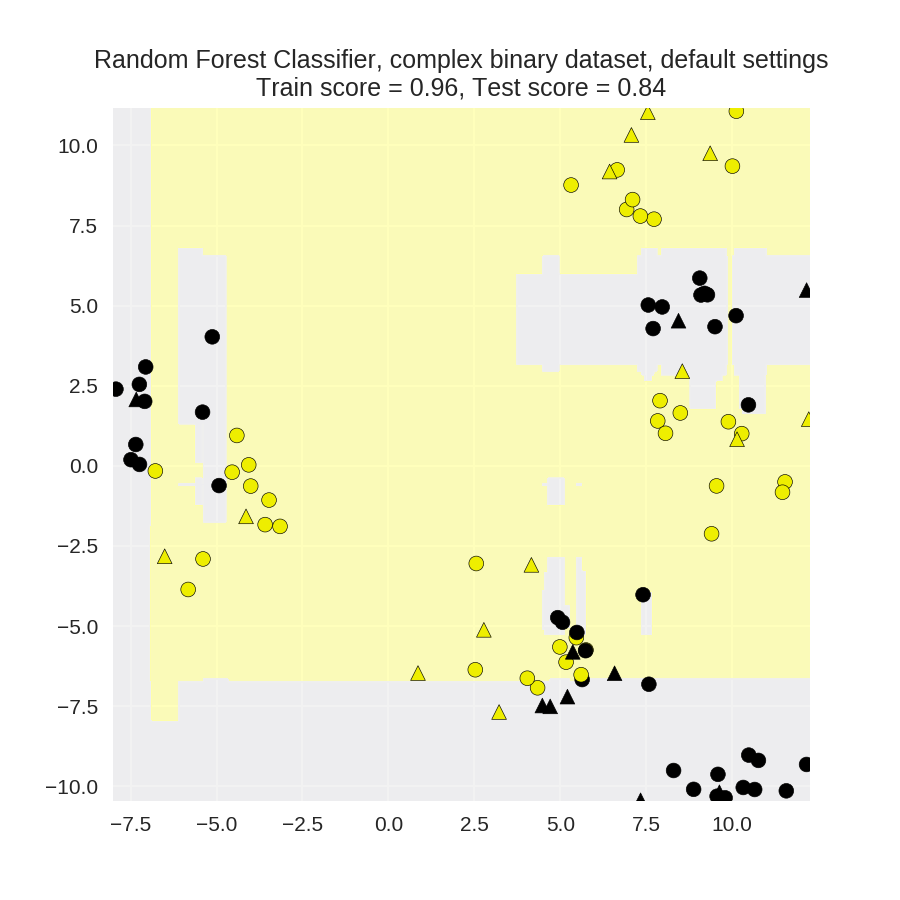

In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### Random forest: Fruit dataset

<IPython.core.display.Javascript object>


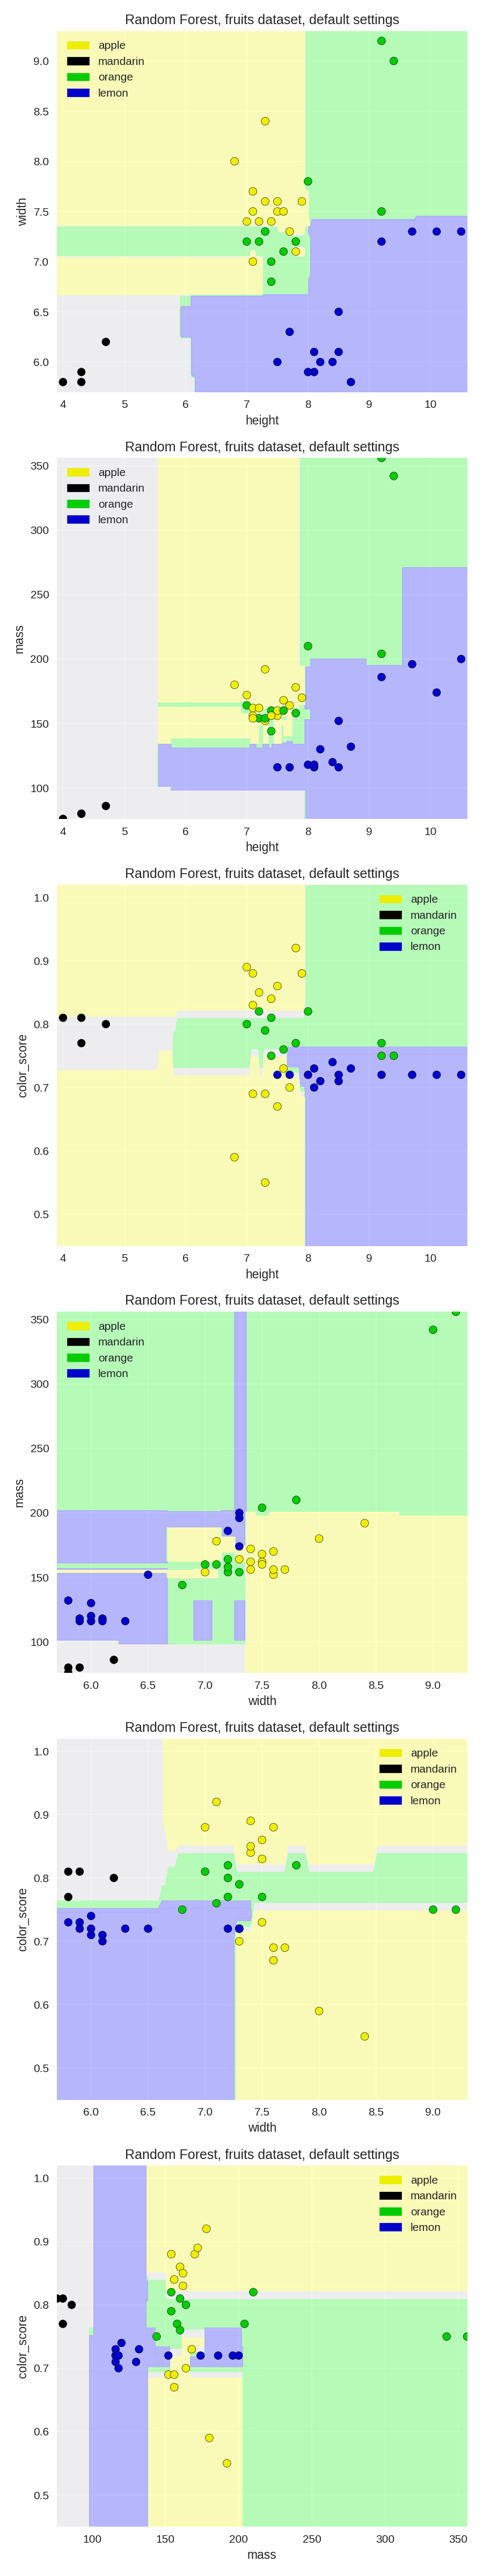

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


"\nNotice that we did not have to perform scaling or other pre-processing as we did with a number of other supervised learning methods. This is one advantage of using random forests. Also note that we passed in a fixed value for the random state parameter in order to make the results reproducible. If we didn't set the random state parameter, the model would likely be different each time due to the randomized nature of the random forest algorithm\n"

In [10]:
'''
 Let's take a look at the notebook code that created and visualized this random forest on the fruit dataset. This code also plots the decision boundaries for the other five possible feature pairs. Again, to use the RandomForestClassifier we import the random forest classifier class from the sklearn ensemble library. After doing the usual train test split and setting up the pipe plot figure for plotting, we iterate through pairs of feature columns in the dataset. For each pair of features we call the fit method on that subset of the training data X using the labels y. We then use the utility function plot class regions for classifier that's available in the shared module for this course to visualize the training data and the random forest decision boundaries. Let's apply random forest to a larger dataset with more features. For comparison with other supervised learning methods, we use the breast cancer dataset again. We create a new random forest classifier and since there are about 30 features, we'll set max_features to eight to give a diverse set of trees that also fit the data reasonably well. We can see that random forest with no feature scaling or extensive parameter tuning achieve very good test set performance on this dataset, in fact, it's as good or better than all the other supervised methods we've seen so far including current life support vector machines and neural networks that require more careful tuning.
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

'''
Notice that we did not have to perform scaling or other pre-processing as we did with a number of other supervised learning methods. This is one advantage of using random forests. Also note that we passed in a fixed value for the random state parameter in order to make the results reproducible. If we didn't set the random state parameter, the model would likely be different each time due to the randomized nature of the random forest algorithm
'''

#### Random Forests on a real-world dataset

In [11]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99


### Gradient-boosted decision trees

<IPython.core.display.Javascript object>


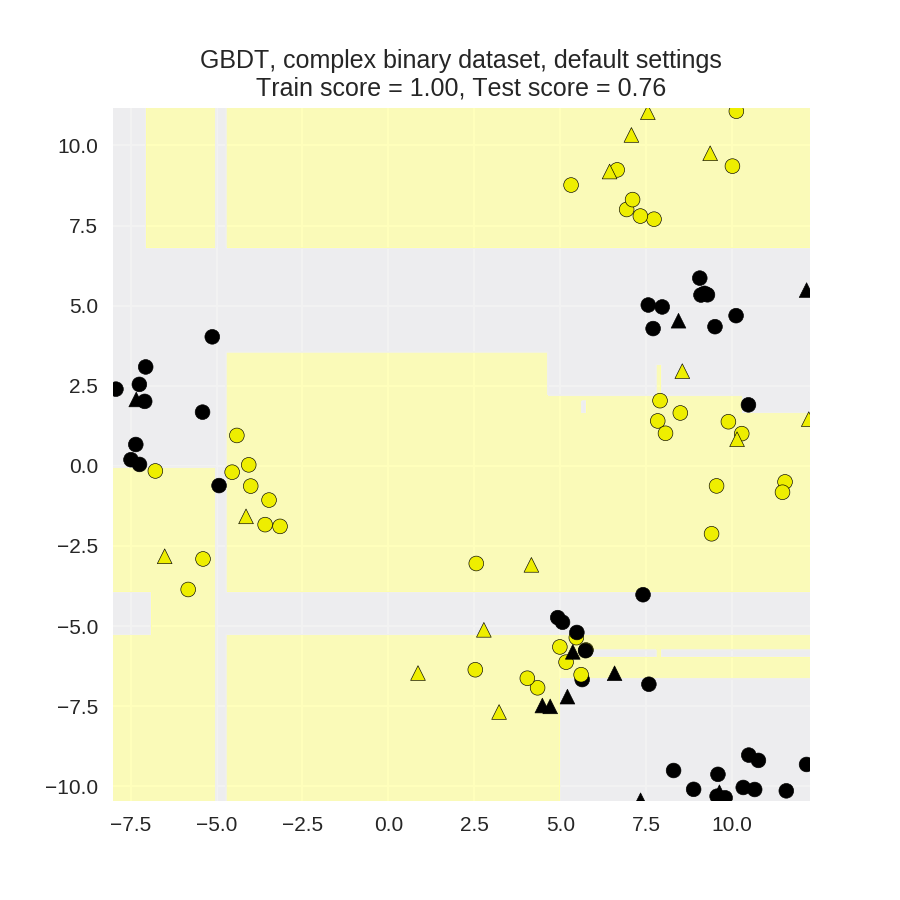

In [12]:
'''
Another tree based ensemble method that's gain wide use in real world application is gradient boosted decision trees. 
Like random forest, gradient boosted trees used an ensemble of multiple tress to create more powerful prediction models for classification and regression. 
In this lecture, we'll provide a brief overview of gradient boosted decision trees, along with the discussion of their key parameters, the control model complexity. 
Unlike the random forest method that builds and combines a forest of randomly different trees in parallel, the key idea of gradient boosted decision trees is that they build a series of trees. Where each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series. 
Typically, gradient boosted tree ensembles use lots of shallow trees known in machine learning as weak learners. Built in a nonrandom way, to create a model that makes fewer and fewer mistakes as more trees are added. 
Once the model is built, making predictions with a gradient boosted tree models is fast and doesn't use a lot of memory. 
Like random forests, the number of estimators in the gradient boosted tree ensemble is an important parameter in controlling model complexity. 

Here's an example showing how to use gradient boosted trees in scikit-learn on our sample fruit classification test, plotting the decision regions that result. 
The code is more or less the same as what we used for random forests. 
But from the sklearn.ensemble module, we import the GradientBoostingClassifier class. 
We then create the GradientBoostingClassifier object, and fit it to the training data in the usual way. By default, the learning rate parameter is set to 0.1, the n_estimators parameter giving the number of trees to use is set to 100, and the max depth is set to 3. As with random forests, you can see the decision boundaries have that box-like shape that's characteristic of decision trees or ensembles of trees. 
'''

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

<IPython.core.display.Javascript object>


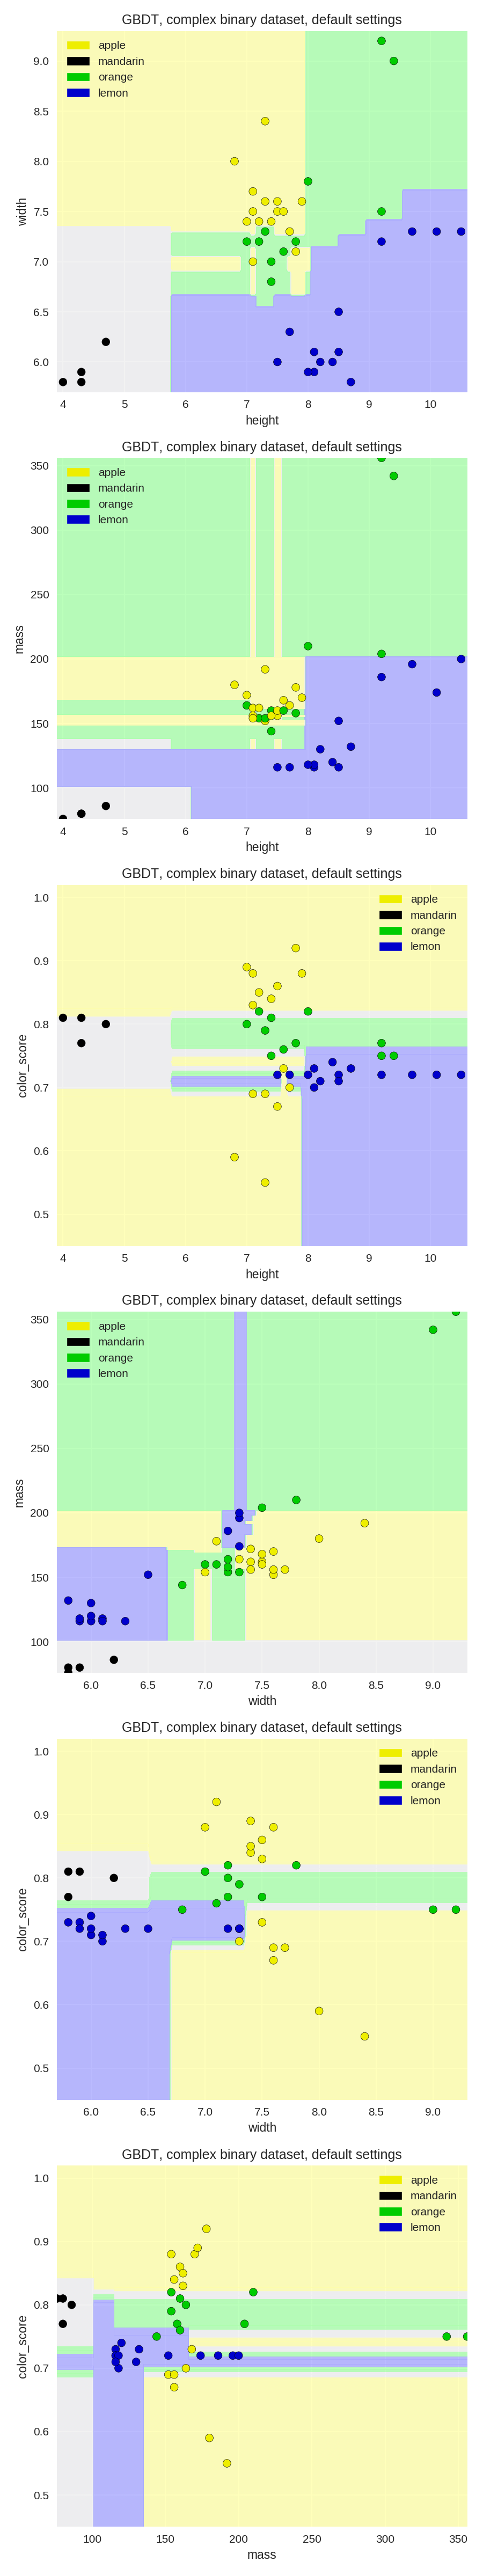

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

In [14]:
'''
A new parameter that does not occur with random forest is something called the learning rate. The learning rate controls how the gradient boost the tree algorithms, builds a series of collective trees. 
When the learning rate is high, each successive tree put strong emphases on correcting the mistakes of its predecessor. 
And thus may result in a more complex individual tree, and those overall are more complex model. With smaller settings of the learning rate, there's less emphasis on thoroughly correcting the errors of the previous step, which tends to lead to simpler trees at each step. 
'''

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


## Neural networks

#### Activation functions

<IPython.core.display.Javascript object>


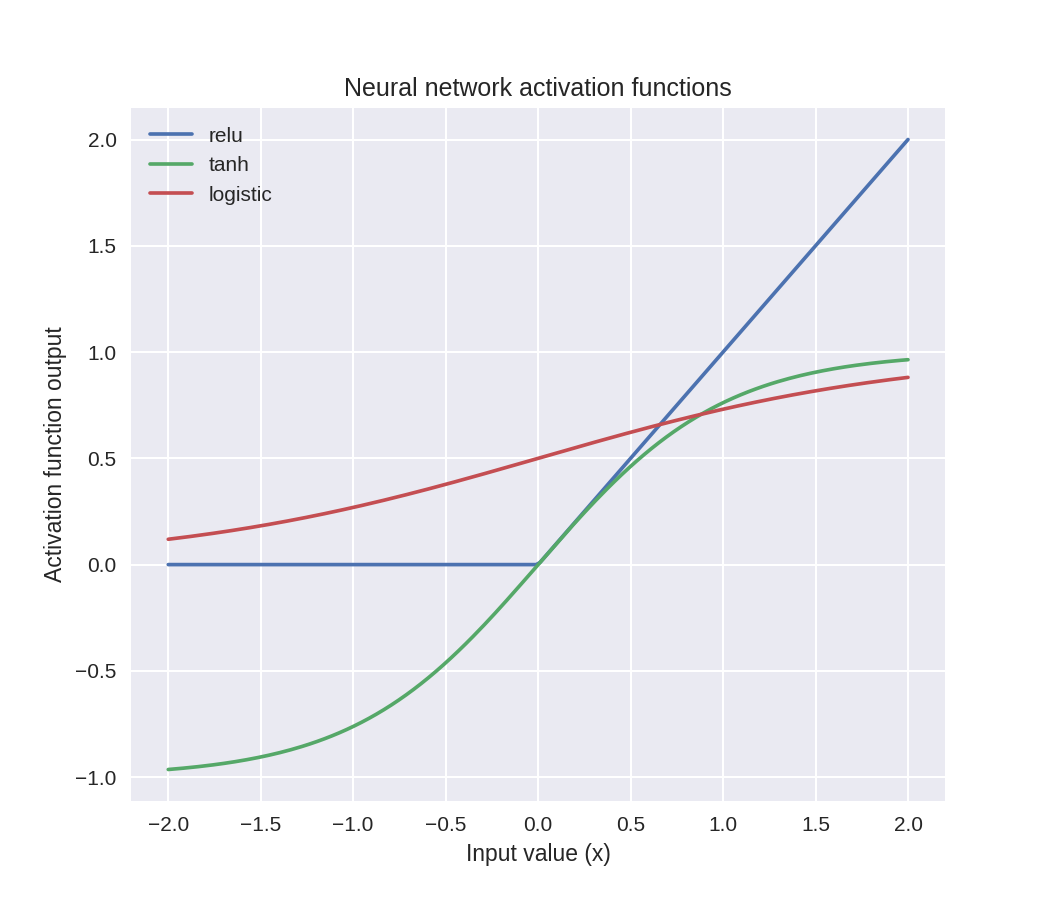

In [16]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification

In [25]:
### Multi-layer Perceptron classifier

In [ ]:
'''
To use a neural network classifier, you import the MLPClassifier class from the sklearn.neural_network module. This code example shows the classifier being fit to the training data, using a single hidden layer. With three different numbers of hidden units in the layer, 1 unit, 10 units and 100 units. As with all other classification types we've seen, you can create the classifier objects with the appropriate parameters. And call the fit method on the training data. 
Here, the main parameter for a neural network classifier is this parameter, hidden_layer_sizes. 
This parameter is a list, with one element for each hidden layer, that gives the number of hidden units to use for that layer. So here we're passing a list with a single element. Meaning we want one hidden layer, using the number in the variable called units. 
By default, if you don't specify the hidden_layer_sizes parameter, scikit-learn will create a single hidden layer with 100 hidden units. While a setting of 10 may work well for simple data sets, like the one we use as examples here. For really complex data sets, the number of hidden units could be in the thousands. It's also possible, as we'll see shortly, to create an MLP with more than one hidden layer. By passing a hidden_layer_sizes parameter with multiple entries. 
I want to also note the use of this extra parameter, called solver. Which specifies the algorithm to use for learning the weights of the network. 
Here, we're using the lbfgs algorithm. We'll discuss the solver parameter setting further, at the end of this lecture. 
Also note that we're passing in a random_state parameter, when creating the MLPClassifier object. Like we did for the train-test split function. And we happened to set this random state parameter to a fixed value of zero. 
This is because for neural networks, their weights are initialized randomly, which can affect the model that is learned. 
Because of this, even without changing the key parameters on the same data set. The same neural network algorithm might learn two different models. Depending on the value of the internal random seed that is chosen. So by always setting the same value for the random seed used to initialize the weights. We can assure the results will always be the same, for everyone using these examples. 

'''

<IPython.core.display.Javascript object>


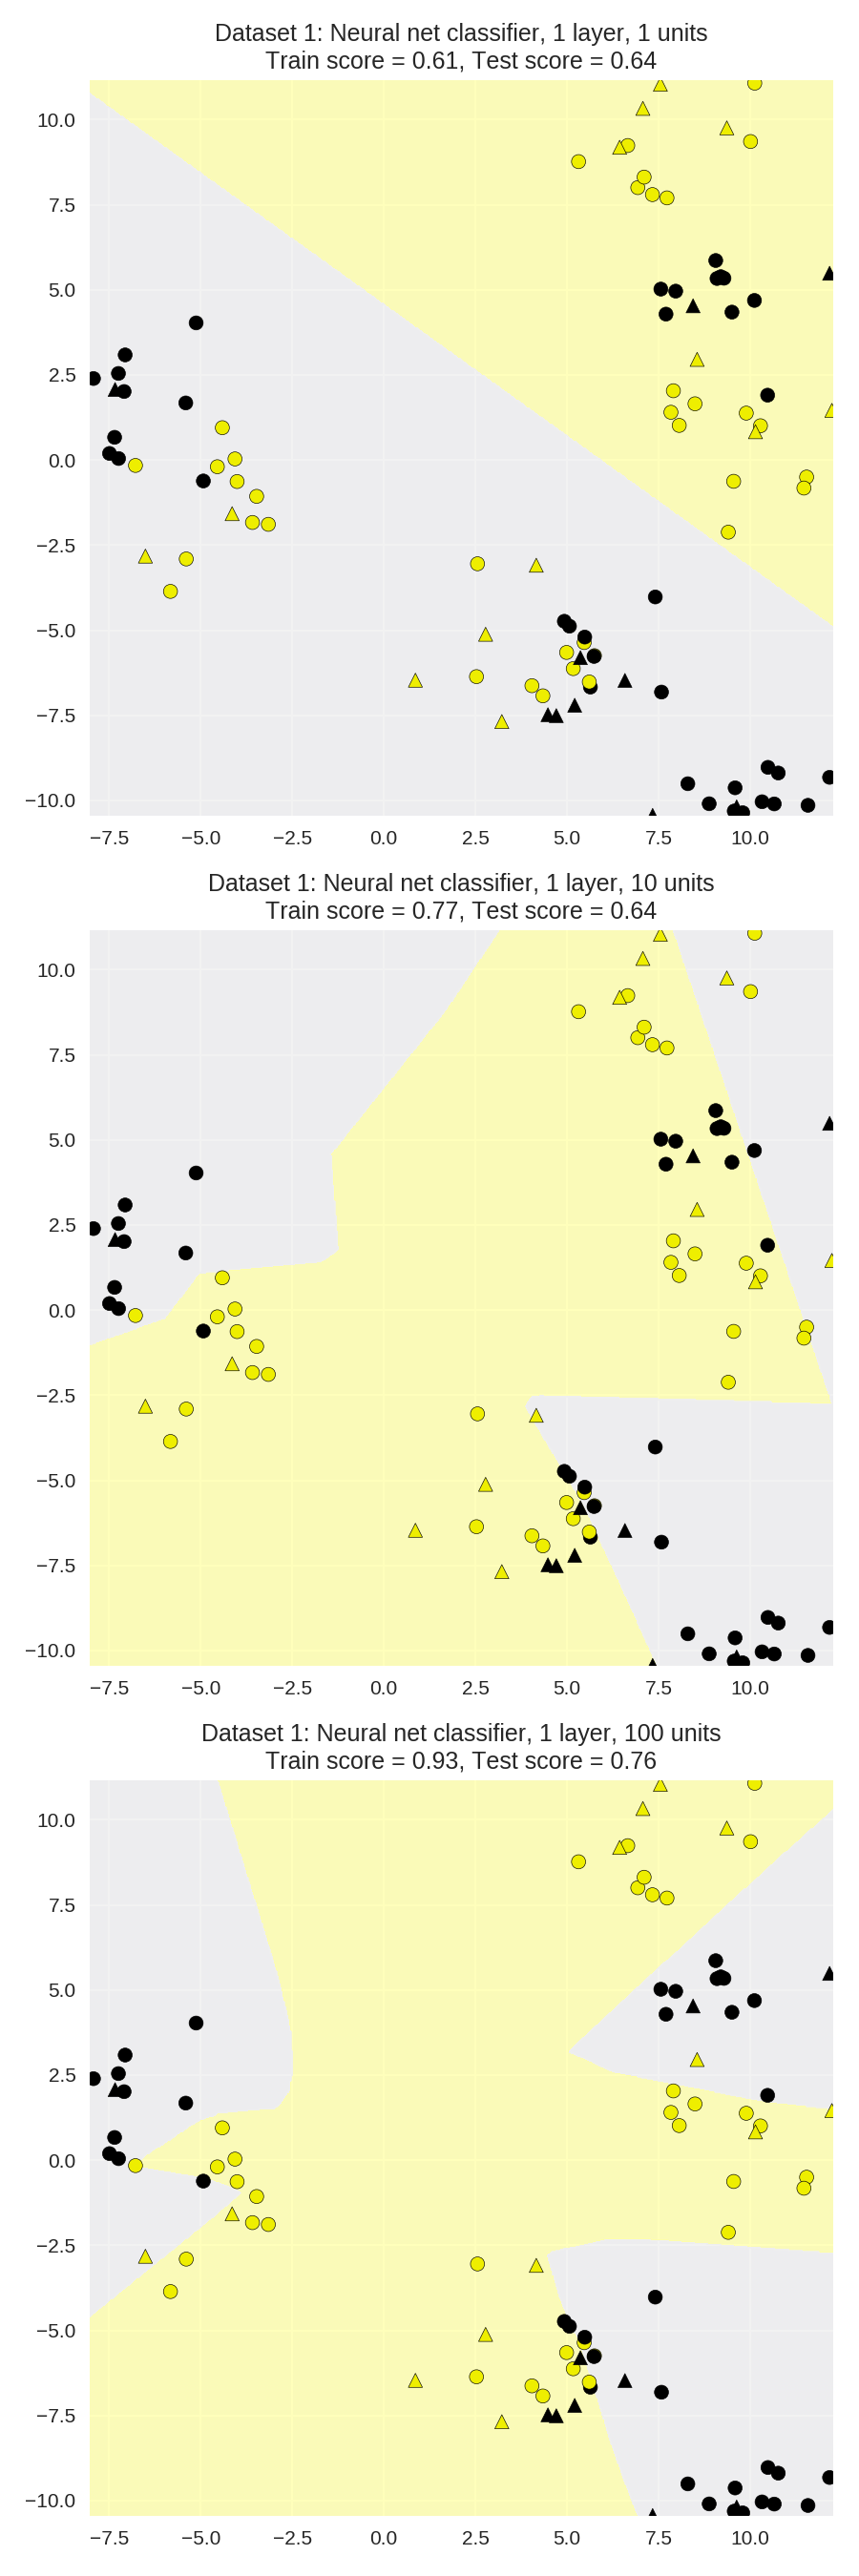

In [26]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    
    
'''
This graphic plots the results of running this code. To show how the number of hidden units in a single layer in the neural network affects the model complexity for classification. With a single hidden unit, the model is mathematically equivalent to logistic regression. We see the classifier returns the familiar simple linear decision boundary between the two classes. 
The training set score's low, and the test score is not much better, so this network model is under-fitting. With ten hidden units, we can see that the MLPClassifier is able to learn a more complete decision boundary. That captures more of the nonlinear, cluster-oriented structure in the data, though the test set accuracy is still low. 
With 100 hidden units, the decision boundary is even more detailed. And achieves much better accuracy, on both the training and the test sets. 
'''

#### Synthetic dataset 1: two hidden layers

<IPython.core.display.Javascript object>


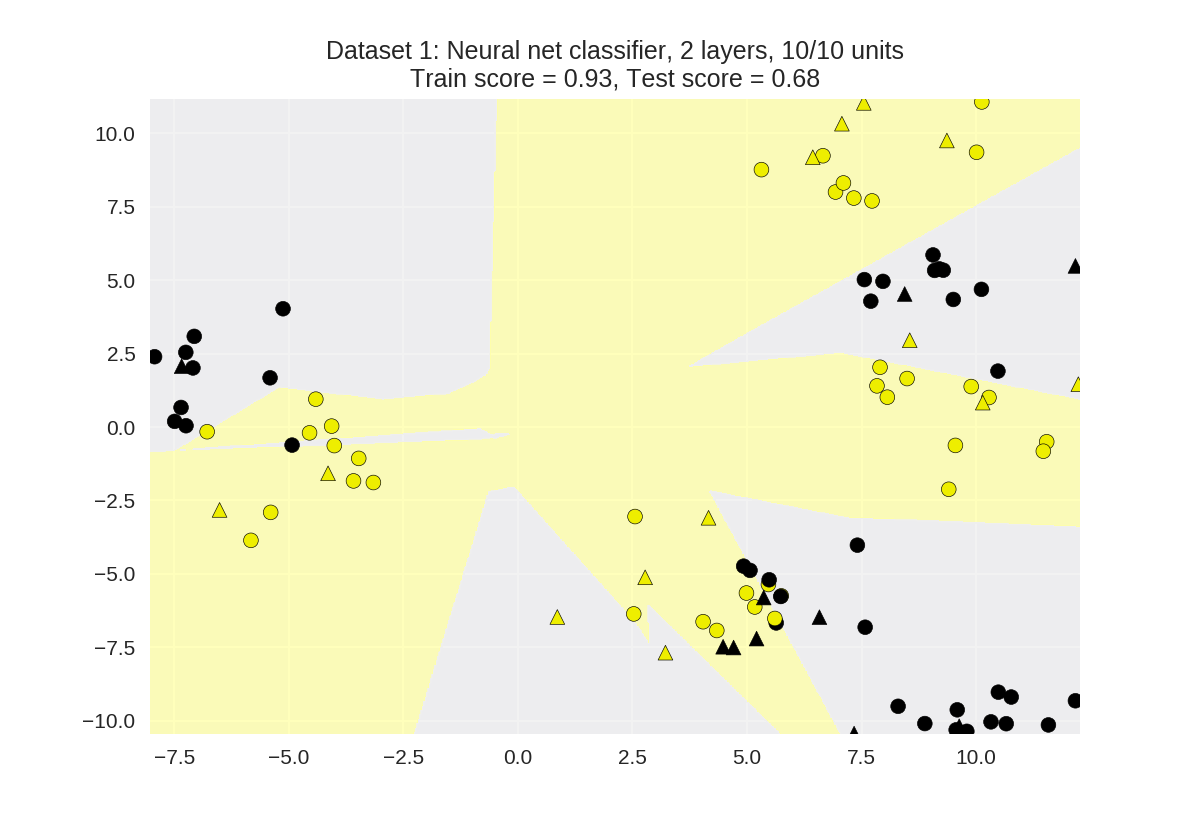

In [27]:
'''
Here's a graphical depiction of a multi-layer perceptron with two hidden layers. 
Adding the second hidden layer further increases the complexity of functions that the neural network can learn, from more complex data sets. 
Taking this complexity further, large architectures of neural networks, with many stages of computation, are why deep learning methods are called deep. And we'll summarize deep learning, in an upcoming lecture for this week. 
Here is an example in the notebook, showing how we create a two-layer MLP, with 10 hidden units in each layer. We just set the hidden_layer_sizes parameter, when creating the MLPClassifier, to a two-element list. Indicating ten units, in each of the two hidden layers. 
You can see the result of of adding the second hidden layer, on the classification problem we saw earlier. 
On the left is the original MLP, with one hidden layer of ten units. And on the right is the same data set, using a new MLP with two hidden layers of ten units each. You can see the MLP with two hidden layers learned a more complex decision boundary. And achieved, in this case, a much better fit on the training data, and slightly better accuracy on the test data. 
'''

from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha

<IPython.core.display.Javascript object>


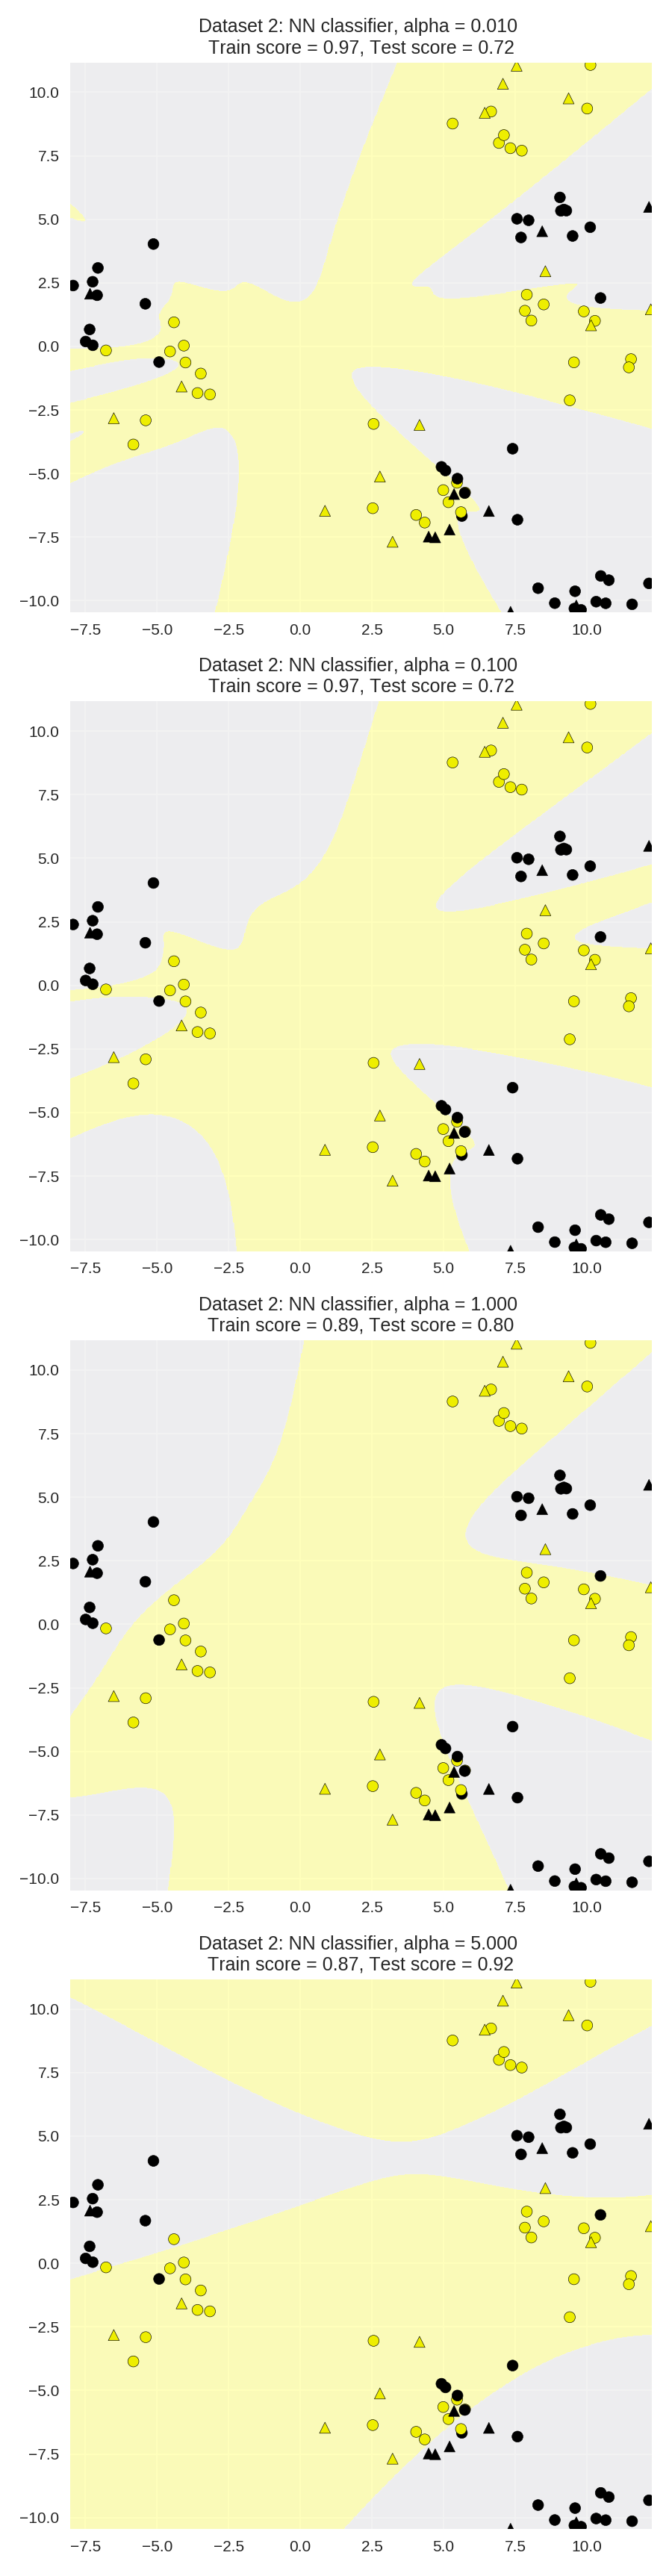

In [28]:
'''
Once we start adding more hidden layers, with lots of hidden units. You can see that the number of weights, or model coefficients, to estimate for a neural network can increase rapidly. 
So that more complex neural networks could have many thousands of weights to estimate. 
We can control this model complexity, just as we did with ridge and lasso regression. By adding an L2 regularization penalty on the weights. Remember that L2 regularization penalizes models that have a large sum of squares of all the weight values. With the effect being, that the neural network prefers models with more weights shrunk close to zero. 
The regularization parameter for MLPs is called alpha, like with the linear regression models. And in scikit-learn, it's set to a small value by default, like 0.0001, that gives a little bit of regularization. 
This code example shows the effects of changing alpha for a larger MLP, with 2 hidden layers of 100 nodes each. From a small value of 0.01, to a larger value of 5.0. For variety here, we're also setting the activation function to use the hyperbolic tangent function. 
Here's the graphical output of this notebook code. You can see the effect of increasing regularization with increasing alpha. 
In the left plot, when alpha is small, the decision boundaries are much more complex and variable. And the classifier's over-fitting, as we can see from the very high training set score, and low test score. On the other hand, the right plot uses the largest value of alpha here, alpha 5.0. And that setting results in much smoother decision boundaries, while still capturing the global structure of the data. And this increased simplicity allows it to generalize much better, and not over-fit to the training set. And this is evident from the much higher test score, in this case. 
'''

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


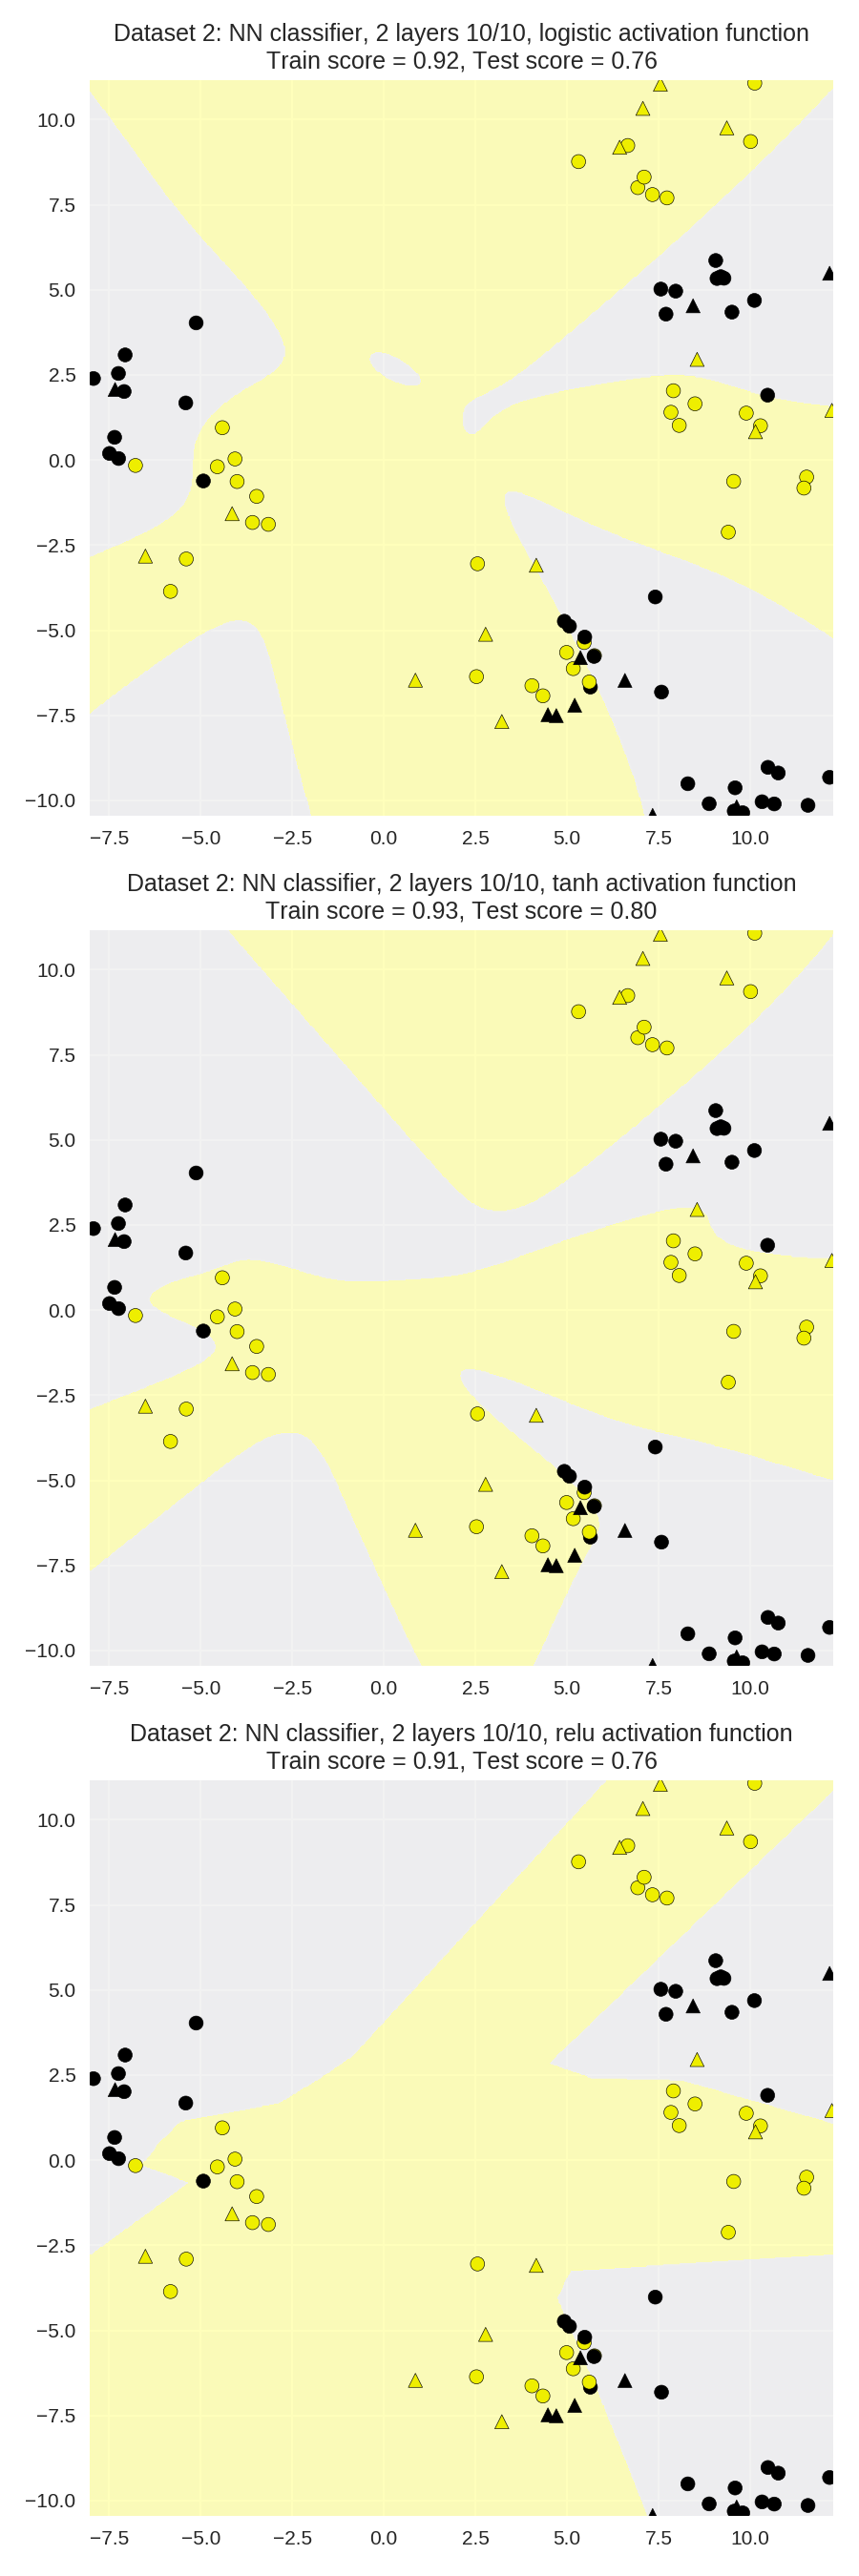

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Neural networks: Regression

<IPython.core.display.Javascript object>


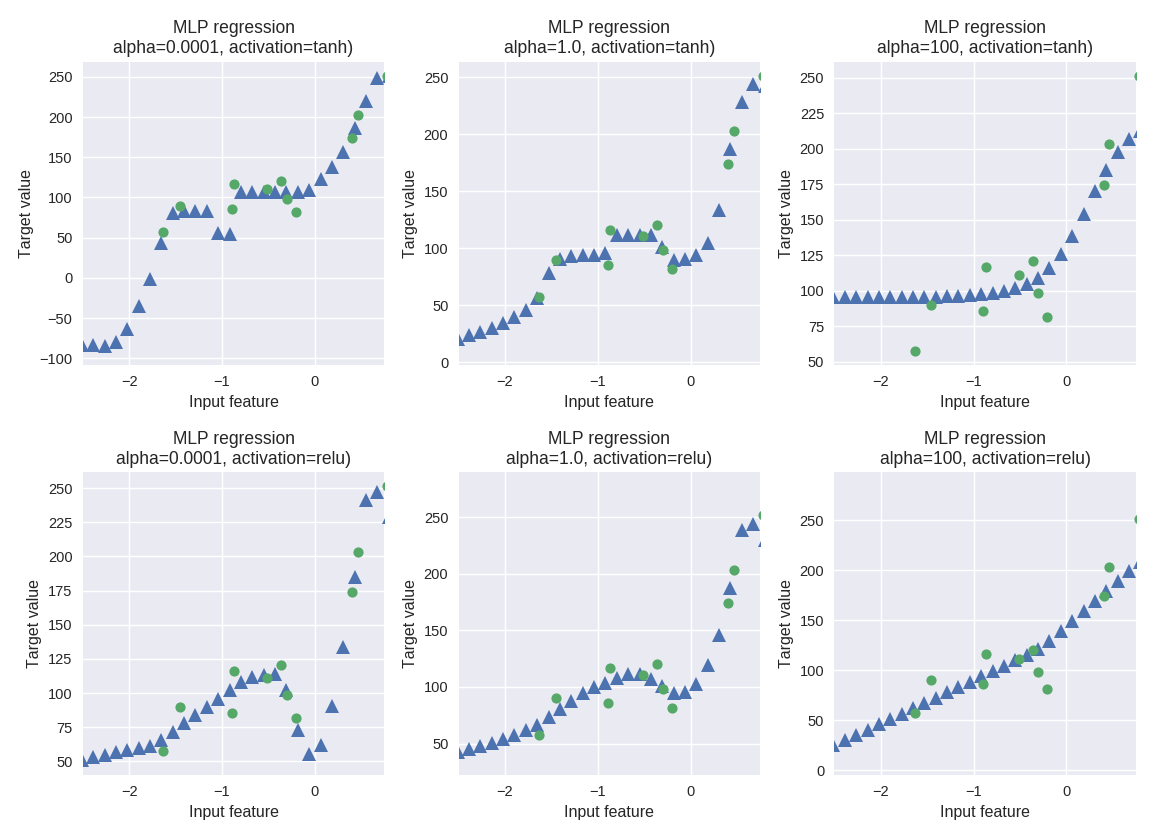

In [30]:

'''
Like many of the other supervised learning methods we've seen, you can also use multi-layer perceptrons for regression, as well as classification. 
We're including MLP regression here, as an example, for two reasons. First, because MLP regression may be useful for some regression problems on its own. But more generally, because some deep learning problems are regression problems. And so, as with classification, using multi-layer perceptrons is a good starting point to learn about the more complex architectures used for regression in deep learning. 
Here's the example of a simple MLP regression model, in our notebook. 
You use the multi-layer perceptron regressor by importing the MLPRegressor class from the sklearn.neural_network module, and then creating the MLPRegressor object. When creating the object here, we're setting the number of hidden layers and units within each hidden layer. Using the same hidden_layer_sizes parameter that we used for classification. 
This example uses two hidden layers, with 100 hidden nodes each. This notebook code has a loop that cycles through different settings of the activation function parameter, and the alpha parameter for L2 regularization. 
Here we've included regression results that use, in the top row, the hyperbolic tangent activation function. And in the bottom row, the relu activation function. 
You can see the smoothness of the activation function somewhat influences the smoothness of the corresponding regression results. 
Along the columns, the plots also show the effect of using different alpha settings, to increase the amount of L2 regularization from left to right. 
Again, as with classification, the effect of increasing the amount of L2 regularization, by increasing alpha. Is to constrain the regression to use simpler and simpler models, with fewer and fewer large weights. 
You can see this effect for both activation functions, in the top and bottom rows. The regression line on the left has higher variance than the much smoother, regularized model on the right. 

'''
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

#### Application to real-world dataset for classification

In [ ]:
'''
Let's apply the multi-layer perceptron to the breast cancer data set. And notice that we first apply the MinMaxScaler, to pre-process the input features. 
Here we'll combine a more complex network, using 2 hidden layers with 100 units each. With a higher regularization setting of alpha at 5.0, and using the lgbfs solver again. 
You can see, that with this multi-layer perceptron, both the training and test set accuracy are among the highest we have obtained on this data set. 

'''

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))